# TASK 2 Prediction using Unsupervised ML

## BY : D.GIRISH

#### Question : From the given ‘Iris’ dataset, predict the optimum number of clustersand represent it visually.

In [8]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
# Load the iris dataset
df = datasets.load_iris()
iris = pd.DataFrame(df.data, columns = df.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.shape

(150, 4)

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
x = iris.values

In [15]:
# Finding the optimum number of clusters for k-means classification using the elbow plot
from sklearn.cluster import KMeans
wcss = []

In [16]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

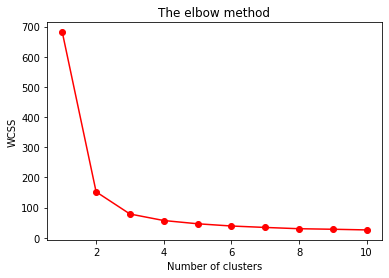

In [17]:
plt.plot(range(1, 11), wcss,'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3,max_iter = 500, n_init = 10, random_state = 0)

In [21]:
kmeans.n_clusters

3

In [23]:
predict = kmeans.fit_predict(x)

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

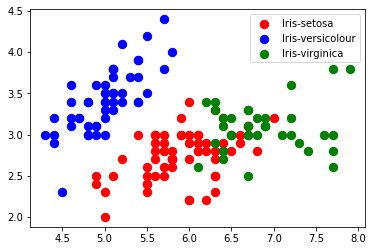

In [26]:
# Visualising the clusters - On the first two columns
plt.scatter(x[predict == 0, 0], x[predict == 0, 1], 
            s = 70, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predict == 1, 0], x[predict == 1, 1], 
            s = 70, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predict == 2, 0], x[predict == 2, 1],
            s = 70, c = 'green', label = 'Iris-virginica')
plt.legend()

In [115]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

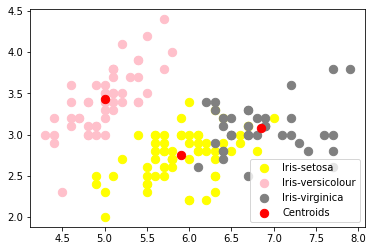

In [116]:
# Plotting the centroids of the clusters
plt.scatter(x[predict == 0, 0], x[predict == 0, 1], 
            s = 70, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[predict == 1, 0], x[predict == 1, 1], 
            s = 70, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[predict == 2, 0], x[predict == 2, 1],
            s = 70, c = 'grey', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 70, c = 'red', label = 'Centroids')

plt.legend()

In [114]:
kmeans.predict([[5.1,3.5,1.4,0.2]])

array([1])